This notebook illustrates some of the basic functionalities of the partyembed package.

In [1]:
from partyembed.explore import Explore
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the pre-trained House model as an Explore object.
m = Explore(model = 'House')

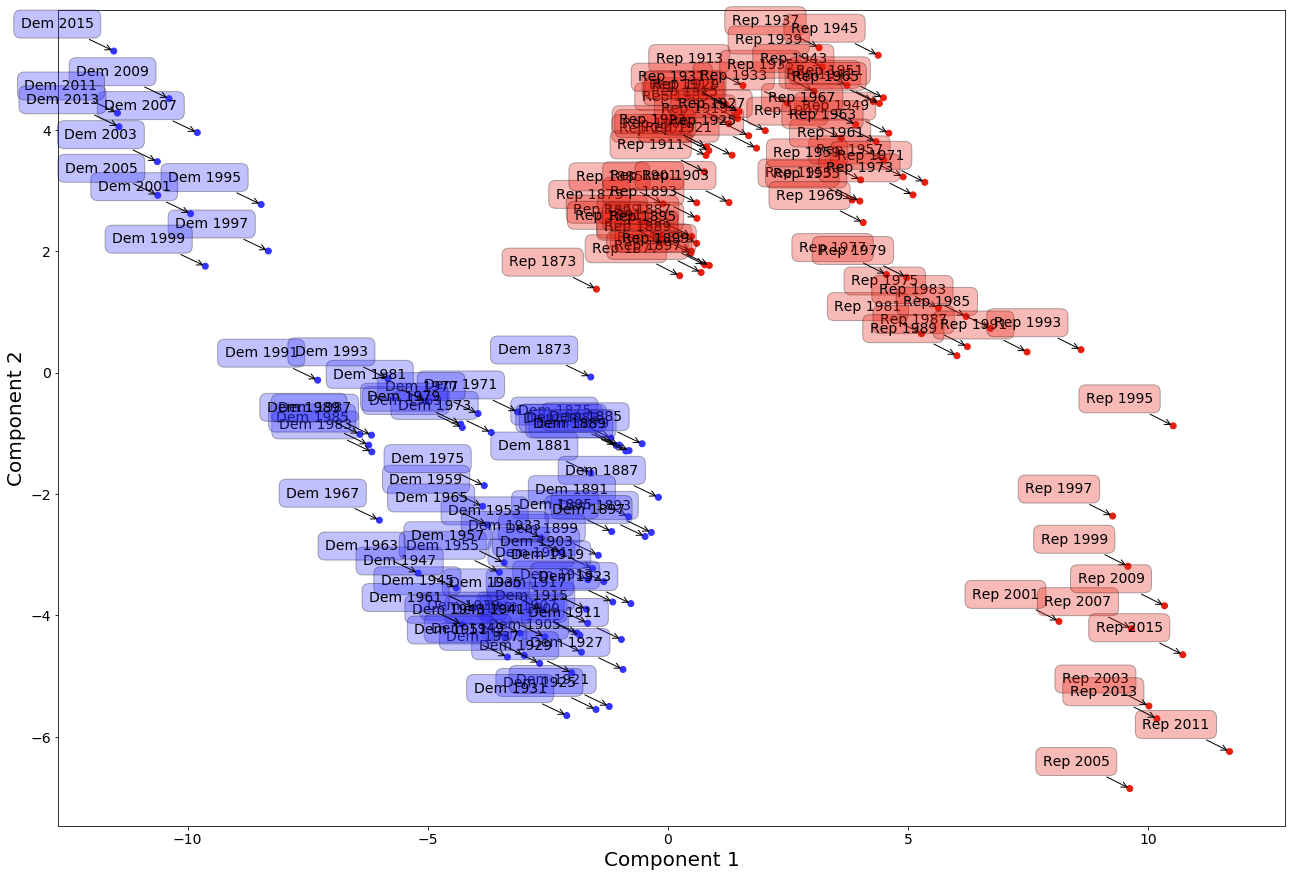

In [4]:
# Plotting the default PCA dimension reduction in 2D.
m.plot()

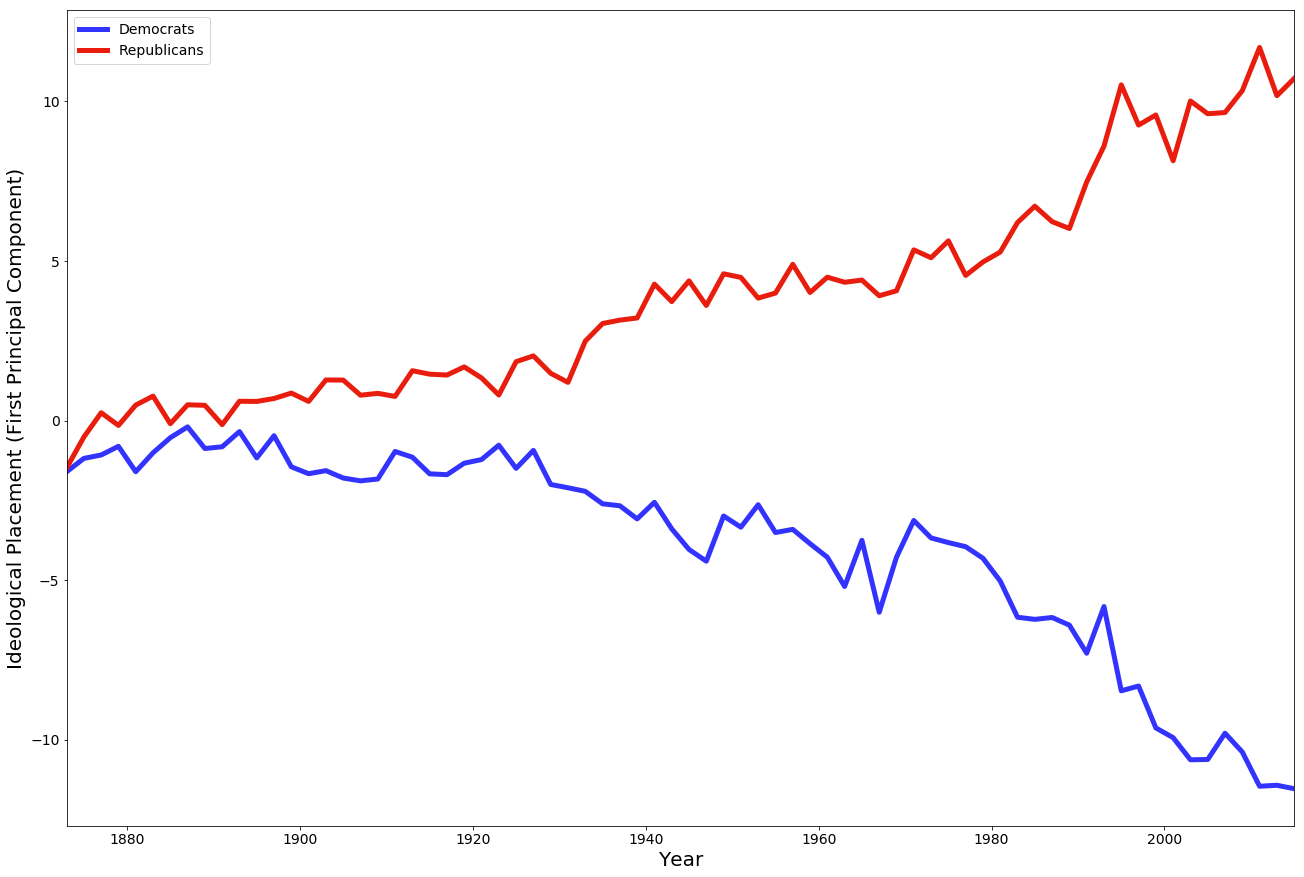

In [5]:
# Plotting time series of first component
m.plot_timeseries(dimension=1)

In [6]:
# Finding words with high and low correlation with each axis.
m.interpret()

--------------------------------------------------------------------------------
Words Associated with Positive Values (Right) on First Component:
--------------------------------------------------------------------------------
bureaucracy, bureaucracies, bureaucratic, nebraska, regimentation, bureaucrats, missouri river, obamacare, centralized, redtape, kansas, hatch act, charter schools, captive nations, free enterprise, hoover commission, lenin, communist, feed grains, wheat
--------------------------------------------------------------------------------
Words Associated with Negative Values (Left) on First Component:
--------------------------------------------------------------------------------
congressional black caucus, wealthiest, decent housing, south african, slums, racism, poor elderly, africanamericans, latinos, africanamerican, segregated, civil rights, gun violence, apartheid, african, poorest, joint resolution res, tax breaks, brooklyn, richest
-------------------------

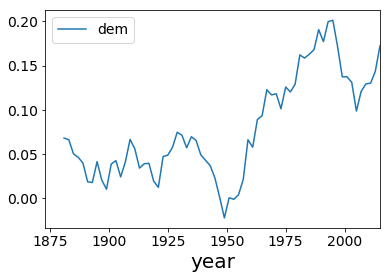

In [7]:
# Create a topic vector and plot the similarity of that topic with party embeddings.
# By default, the 'issue' method returns a 5-period moving average in a pandas data frame.
env = m.issue("environment")
env.plot(x = 'year', y='dem')

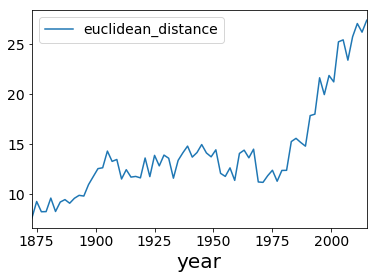

In [9]:
# Create a basic time-series plot of party polarization.
m.polarization().plot(x='year',y='euclidean_distance')

In [10]:
# Run the validation against gold standards.
m.validate()

Pearson Correlation Coefficient:
voteview: 0.918

Spearman Rank Correlation Coefficient:
voteview: 0.896

Pairwise Accuracy:
voteview: 85.66%



In [16]:
# Exploring the guided method with default vocabulary mentioned in the article.
m = Explore(model = 'House', method='guided')

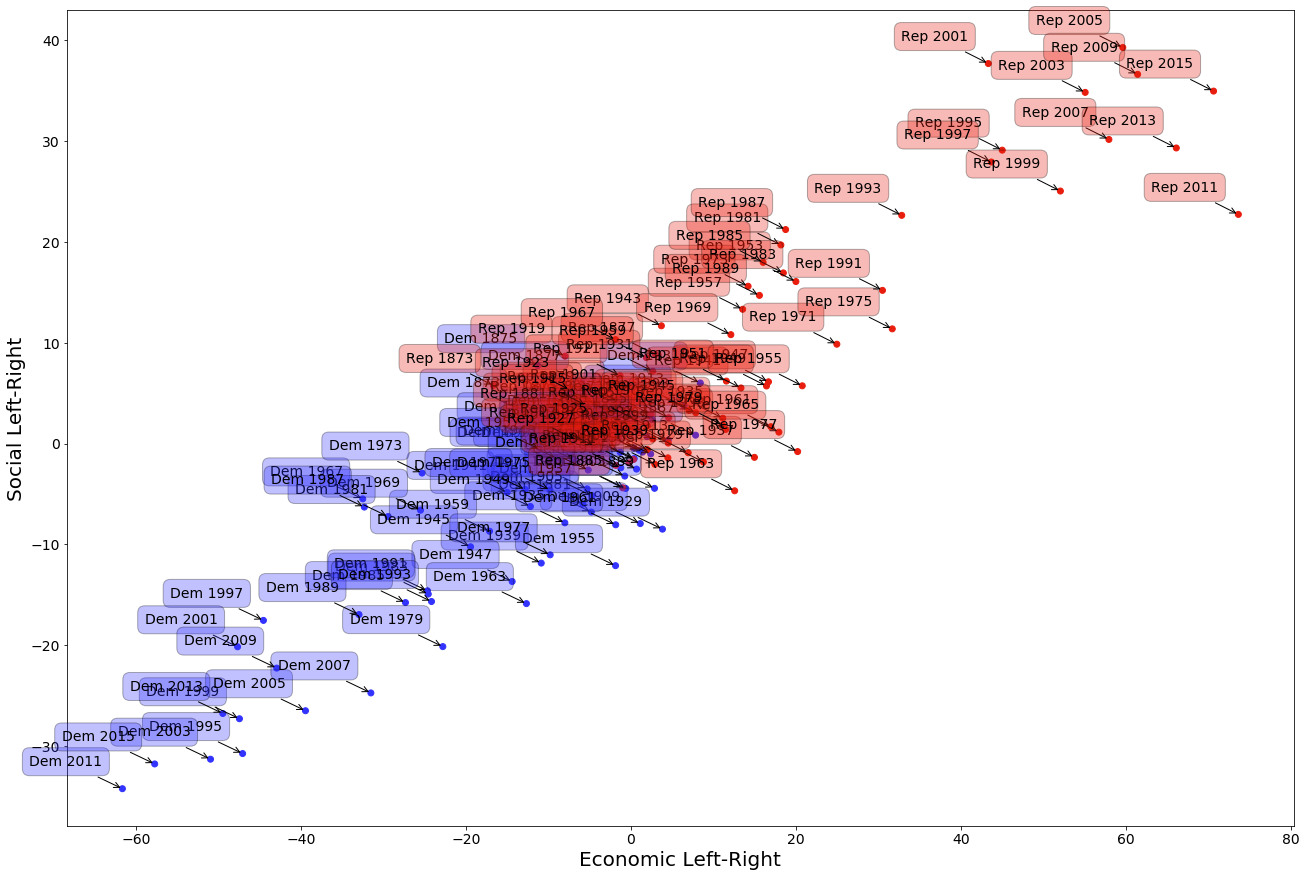

In [17]:
# Plotting the projection on customized axes.
m.plot()

In [18]:
# Using the model as a gensim Doc2Vec object.
model = m.model

In [19]:
# Finding most similar words.
model.wv.most_similar('environment')

[('protecting_environment', 0.6044716835021973),
 ('healthy_environment', 0.5966728925704956),
 ('clean_air_clean_water', 0.5914993286132812),
 ('clean_water_clean_air', 0.5612006187438965),
 ('environments', 0.5548286437988281),
 ('environmental', 0.5505703091621399),
 ('ecology', 0.528766393661499),
 ('environmental_protection', 0.5244860053062439),
 ('air_breathe', 0.5212933421134949),
 ('air_breathe_water_drink', 0.5074530839920044)]

In [22]:
# Finding words most similar to Democrats, 114th Congress.
model.wv.similar_by_vector(model.docvecs['D_114'], topn=10, restrict_vocab=20000)

[('gentlewoman_california', 0.3825967311859131),
 ('congressional_black_caucus', 0.3481924831867218),
 ('latinos', 0.3448483943939209),
 ('latino', 0.33004531264305115),
 ('black_caucus', 0.3071836233139038),
 ('protections', 0.30672740936279297),
 ('progressive_caucus', 0.3051140010356903),
 ('gun_violence', 0.2819370627403259),
 ('oakland', 0.2802084684371948),
 ('decent_housing', 0.27823004126548767)]